# LAB Session 4 (19/12/2022)

You will generate the Higgs mass spectrum, with signal and background, and perform fits to binned data.

Then you will repeat the generation to emulate multiple experiments and perform some statistical analysis.

This notebook provides guidance to obtain a correct spectrum and fit it. At the end you will find a few questions to answer (by repeating some of the steps and making some plots).

The main steps are:
- Generate Gaussian signal $S$
 - plot the distribution
- Generate exponential background $B$
 - plot the distribution 
- Plot the distribution of data by stacking signal and background
- Obtain binned data from histogram
- Fit binned data with `curve_fit`
- Compute the signal significance defined as $S/\sqrt B$

At this point you can repeat the steps above to perform the studies and make the plots described at the end of the notebook.

# Modules for this exercise

- `scipy.optimize` for fitting
- `scipy.integrate` for integration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import optimize as opt  
from scipy import integrate

# Parameters
- Number of signal events
- Number of background events
- Higgs mass
- Higgs width due to detector resolution (intrinsic width is negligible)

In [2]:
n_sig_0 = 100
n_bkg_0 = 10000

m_sig = 125 # GeV
w_sig = 0.02 # in %
w_sig *= m_sig

# Histogram data
Boundaries and number of bins

In [3]:
x_min = 0    # GeV
x_max = 200  # GeV
n_bins = 100
bin_width = (x_max-x_min)/n_bins # GeV
print('%d bins from %.1f to %.1f GeV' % (n_bins, x_min, x_max))
print('Bin width: %.2f GeV' % (bin_width))

100 bins from 0.0 to 200.0 GeV
Bin width: 2.00 GeV


## Generate signal sample

`n_sig_0` events with a Gaussian distribution around Higgs mass

In [4]:
#with these we can print variables 'inline'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
sigSample = np.random.normal(loc=m_sig, scale=w_sig, size=(n_sig_0))
"Signal Sample:"
sigSample
"Signal shape:"
np.shape(sigSample)

'Signal Sample:'

array([124.54680329, 123.57675741, 125.04952759, 124.1653646 ,
       123.17545465, 125.35171059, 123.30390878, 122.28797493,
       128.6744024 , 125.22446295, 124.83048722, 123.88737447,
       123.80358111, 125.50226351, 132.50757516, 123.45481941,
       120.80674144, 130.73672322, 128.20758081, 124.06280084,
       121.35756972, 123.42648832, 120.34185554, 126.0078569 ,
       123.2702097 , 126.98352808, 127.02925979, 123.35973505,
       127.56906016, 130.26655033, 128.48756987, 128.14198051,
       127.51297108, 121.71104068, 124.5882965 , 129.03289742,
       128.04376376, 126.23349414, 124.67281294, 124.99512367,
       124.38740798, 126.81459673, 128.30931574, 123.81141705,
       122.41368027, 128.21916618, 121.7548796 , 122.40329749,
       126.21435995, 126.77015134, 130.41748577, 126.77123958,
       121.54479857, 126.71459607, 124.92327238, 124.31502982,
       127.21912303, 125.48444378, 126.46388191, 123.77414344,
       126.73495975, 126.37944602, 122.11340163, 122.87

'Signal shape:'

(100,)

## Plot signal distribution

Use [matplotlib.pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

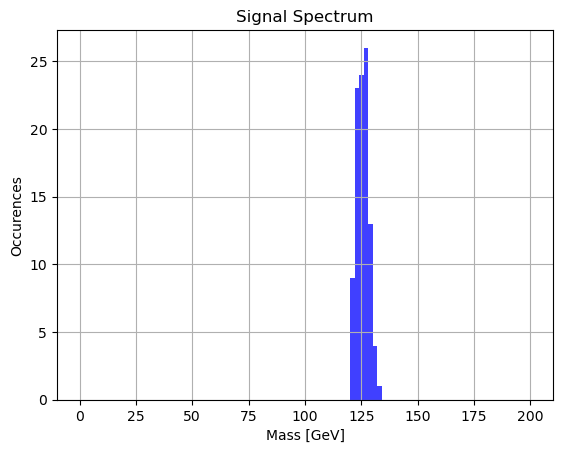

In [6]:
%matplotlib inline
fig, ax = plt.subplots()
ax.grid()
n, bins, patches = ax.hist(sigSample, n_bins, histtype='stepfilled', range=(x_min,x_max),
                           density=False, facecolor='Blue', alpha=0.75)
_ = ax.set_title('Signal Spectrum')
_ = ax.set_xlabel('Mass [GeV]')
_ = ax.set_ylabel('Occurences')

## Generate background sample

`n_bkg_0` events with an exponential distribution. Use [numpy.random.exponential](https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html).

Choose an exponential parameter that populates bins with tens of events for mass of 200 GeV. For example, use `scale=80` in `numpy.random.exponential`.

In [7]:
bkgScale = 82 #exp scale 
bkgSample = np.random.exponential(scale=bkgScale, size=(n_bkg_0))
"Background Sample:"
bkgSample
"Background shape:"
np.shape(bkgSample)

'Background Sample:'

array([ 47.81658312,  32.08161214,  78.27836478, ...,  92.69135575,
       143.08091031,  90.7704153 ])

'Background shape:'

(10000,)

## Plot background distribution
Use [matplotlib.pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

Useful options:
- _bins=n_ : fix number of bins to _n_
- _hist=options_ : for example _hist='step'_ to show empty histogram
- _range=(min,max)_ : fix the boundaries of data in histogram. 
  - **NB**: this is different than using _xlim(min,max)_ which is only for visualization


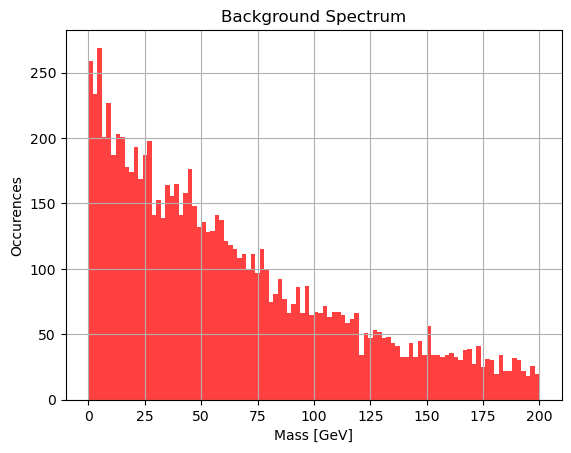

In [8]:
%matplotlib inline
fig, ax = plt.subplots()
ax.grid()
n, bins, patches = ax.hist(bkgSample, n_bins, histtype='stepfilled', range=(x_min,x_max),
                           density=False, facecolor='Red', alpha=0.75)
_ = ax.set_title('Background Spectrum')
_ = ax.set_xlabel('Mass [GeV]')
_ = ax.set_ylabel('Occurences')

## Stack signal and background data in the same histogram

If you have two data arrays `signal` and `background` try the following options to stack the signal on top of the background:

```python
pl.hist( (background,signal), bins=n_bins, label=('backgroud', 'signal'), color=('red','blue'), stacked=True , 
        histtype='step', range=(x_min,x_max) )
```

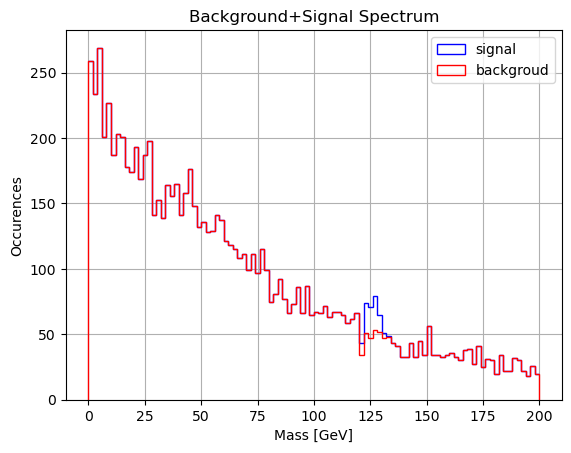

In [9]:
%matplotlib inline
fig, ax = plt.subplots()
ax.grid()
n, bins, patches = ax.hist( (bkgSample,sigSample), bins=n_bins, label=('backgroud', 'signal'), 
                           color=('red','blue'), stacked=True, histtype='step', range=(x_min,x_max) )
_ = ax.set_title('Background+Signal Spectrum')
_ = ax.set_xlabel('Mass [GeV]')
_ = ax.set_ylabel('Occurences')
_ = ax.legend()

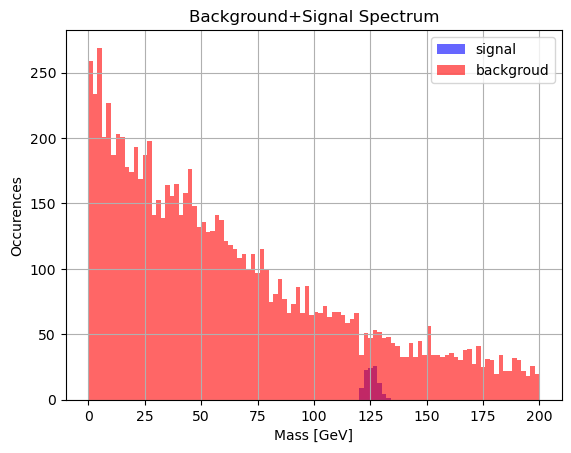

In [10]:
%matplotlib inline
fig, ax = plt.subplots()
ax.grid()
n, bins, patches = ax.hist( (bkgSample,sigSample), bins=n_bins, label=('backgroud', 'signal'), 
                           color=('red','blue'), stacked=False, histtype='stepfilled', range=(x_min,x_max), alpha=0.6 )
_ = ax.set_title('Background+Signal Spectrum')
_ = ax.set_xlabel('Mass [GeV]')
_ = ax.set_ylabel('Occurences')
_ = ax.legend()

## Merge signal and background samples

The data collected in an experiment contains both signal and background. We have simulated the two samples separately and they can be merged with [numpy.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html):

```python
a = np.array(...)
b = np.array(...)

data = np.concatenate((a,b))
```
Note that the first positional argument of the function is a tuple of numpy arrays.

In [11]:
dataSample = np.concatenate((sigSample,bkgSample),axis=0)
'dataSample'
dataSample
'np.shape(dataSample)'
np.shape(dataSample)

'dataSample'

array([124.54680329, 123.57675741, 125.04952759, ...,  92.69135575,
       143.08091031,  90.7704153 ])

'np.shape(dataSample)'

(10100,)

## Binned data

The data sample so far is unbinned: we have a number of signal and background events. 

Now we can create a binned version to be fitted. This is achieved with the `pyplot.hist` function which, as we saw, returns a list of counts for each bin and the bin boundaries
```python

binned_data, bins, _ = plt.hist(data, bins=n_bins, label='all data', color='black', histtype='step', range=(x_min, x_max))

```

Plot the merged data and make sure it is indeed the sum of the two sub-samples.

'As one can see the merged data is indeed the sum of the signal and background sub-sample:'

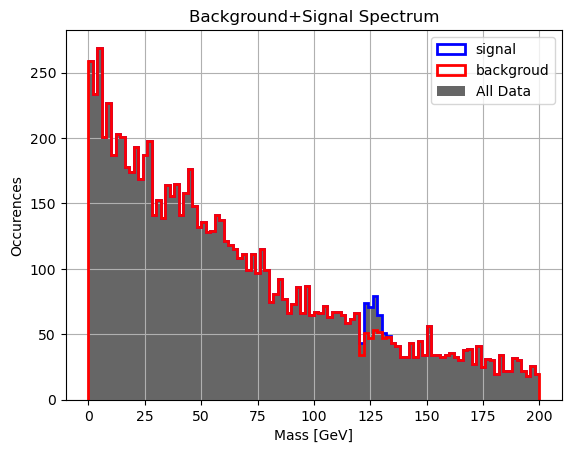

In [12]:
%matplotlib inline
fig, ax = plt.subplots()
ax.grid()
n, bins, patches = ax.hist( (bkgSample,sigSample), bins=n_bins, label=('backgroud', 'signal'), 
                           color=('red','blue'), stacked=True, histtype='step', range=(x_min,x_max), lw=2 )
_ = ax.set_title('Background+Signal Spectrum')
_ = ax.set_xlabel('Mass [GeV]')
_ = ax.set_ylabel('Occurences')

binned_data, bins, _ = plt.hist(dataSample, bins=n_bins, label='All Data', color='black', alpha=0.6,
                                histtype='stepfilled', range=(x_min, x_max))

_ = ax.legend()

"As one can see the merged data is indeed the sum of the signal and background sub-sample:"

## `bins` list

The list `bins` contains `n_bins + 1` values. These are run from the edge of the first bin to the edge of the last bin. Verify this.

In [13]:
"bins array:"
bins
"bins shape:"
np.shape(bins)
"len(bins) == n_bins+1 :"
len(bins) == n_bins+1

'bins array:'

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104., 106., 108.,
       110., 112., 114., 116., 118., 120., 122., 124., 126., 128., 130.,
       132., 134., 136., 138., 140., 142., 144., 146., 148., 150., 152.,
       154., 156., 158., 160., 162., 164., 166., 168., 170., 172., 174.,
       176., 178., 180., 182., 184., 186., 188., 190., 192., 194., 196.,
       198., 200.])

'bins shape:'

(101,)

'len(bins) == n_bins+1 :'

True

## Center of bins (data along $x$ axis)

Using a comprehension, prepare a list `center_bins` from `bins` with length of `n_bins` which contains the center of each bin of the histogram. Check your result.

In [14]:
center_bins = [i+0.5*bin_width for i in bins[:-1]]
"len(center_bins)"
len(center_bins)
"len(center_bins)==n_bins :"
len(center_bins) == n_bins
"centered bins:"
center_bins

'len(center_bins)'

100

'len(center_bins)==n_bins :'

True

'centered bins:'

[1.0,
 3.0,
 5.0,
 7.0,
 9.0,
 11.0,
 13.0,
 15.0,
 17.0,
 19.0,
 21.0,
 23.0,
 25.0,
 27.0,
 29.0,
 31.0,
 33.0,
 35.0,
 37.0,
 39.0,
 41.0,
 43.0,
 45.0,
 47.0,
 49.0,
 51.0,
 53.0,
 55.0,
 57.0,
 59.0,
 61.0,
 63.0,
 65.0,
 67.0,
 69.0,
 71.0,
 73.0,
 75.0,
 77.0,
 79.0,
 81.0,
 83.0,
 85.0,
 87.0,
 89.0,
 91.0,
 93.0,
 95.0,
 97.0,
 99.0,
 101.0,
 103.0,
 105.0,
 107.0,
 109.0,
 111.0,
 113.0,
 115.0,
 117.0,
 119.0,
 121.0,
 123.0,
 125.0,
 127.0,
 129.0,
 131.0,
 133.0,
 135.0,
 137.0,
 139.0,
 141.0,
 143.0,
 145.0,
 147.0,
 149.0,
 151.0,
 153.0,
 155.0,
 157.0,
 159.0,
 161.0,
 163.0,
 165.0,
 167.0,
 169.0,
 171.0,
 173.0,
 175.0,
 177.0,
 179.0,
 181.0,
 183.0,
 185.0,
 187.0,
 189.0,
 191.0,
 193.0,
 195.0,
 197.0,
 199.0]

## Bin count (data along $y$ axis)

Verify that the list `binned data` has length `n_bins`.

In [15]:
len(binned_data) == n_bins

True

## Fitting the histogram

We want to fit the binned data (`binned_data` as a function of `center_bins`) using the [optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function.

The fit model has to be the sum of a Gaussian and an exponential.

Define three functions with proper arguments
1. `sig(x, Norm, mean, width)` for the signal Gaussian
2. `bkg(x, Norm, alpha)` for the background exponential
3. `total(x, NormSig, mean, width, NormBkg, alpha)` sum of signal and background

There is a total of 5 parameters to be fitted from the simulated data.

In [16]:
def sig(x,norm,mean,width):
    return norm*np.exp(-0.5*( (x-mean)/width )**2)
def bkg(x,norm,alpha):
    return norm*np.exp(-x/alpha)
def total(x,normSig,mean,width,normBkg,alpha):
    return sig(x,normSig,mean,width) + bkg(x,normBkg,alpha)

## Plot fit function

As a sanity check, plot the 3 functions and make sure they are implemented correctly.

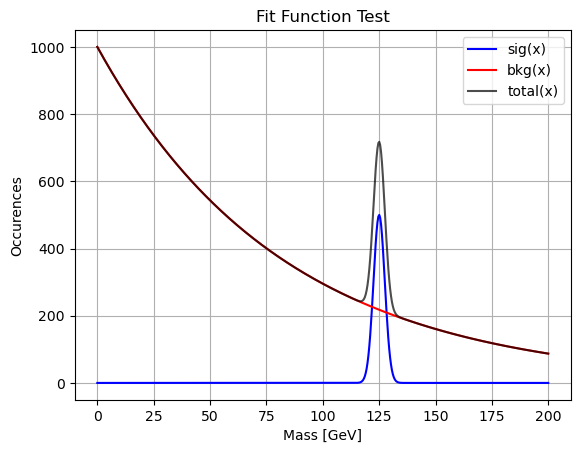

In [17]:
%matplotlib inline
fig, ax = plt.subplots()
ax.grid()

_ = ax.set_title('Fit Function Test')
_ = ax.set_xlabel('Mass [GeV]')
_ = ax.set_ylabel('Occurences')

x = np.linspace(x_min,x_max,500)
_ = ax.plot(x,sig(x,norm=n_sig_0*5, mean=m_sig, width=w_sig),label='sig(x)',color='Blue')
_ = ax.plot(x,bkg(x,norm=n_bkg_0/10.0, alpha=bkgScale),label='bkg(x)',color='Red')
_ = ax.plot(x,total(x,normSig=n_sig_0*5, mean=m_sig, width=w_sig,normBkg=n_bkg_0/10.0, alpha=bkgScale),
        label='total(x)',color='Black',alpha=0.7)



_ = ax.legend()

## Initial conditions for the fit

It is always a good practice to provide some initial values for the parameters to be fitted, especially in a case like this one where there are 5 parameters and the data varies a lot across the spectrum. Initial values are passed to [optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) with the argument `p0`:
```python
pars, pars_cov = opt.curve_fit(..., p0=[500, m_sig, w_sig, 1000, alpha])
```

Recall that `pars` is the list of fitted parameters (in the order they appear in the definition of the fit function) and `pars_cov` is their covariance matrix that can be used to compute the uncertainty on each fitted parameter.

In [18]:
alpha=bkgScale
pars, pars_cov = opt.curve_fit(total,center_bins,binned_data,p0=[500, m_sig, w_sig, 1000, alpha])

## Fitted parameters
- Print the parameters
- Print the covariance matrix

Are the fitted values close to the generated values?

In [19]:
alpha=bkgScale
true_pars = [100,m_sig,w_sig,1000,alpha]
par_lab=['normSig','m_sig','w_sig','normBkg','alpha']
perr = np.sqrt(np.diag(pars_cov))
print("For the fitted parameter abs( (fitted-true)/sigma ) is equal to:")
for i,tp in enumerate(true_pars):
    print(f"\n{par_lab[i]}: {np.abs(pars[i]-tp)/perr[i]}")

For the fitted parameter abs( (fitted-true)/sigma ) is equal to:

normSig: 7.461703452954208

m_sig: 1.2914688061008366

w_sig: 0.1920573342182825

normBkg: 201.8967265480104

alpha: 0.3690264961002403


## Plot the histogram and fit

- Plot the data histogram
- Overlay the fitted function (total) with the fitted parameters
- Overlay the background function with the fitted parameters
- Print the fitted parameters with proper legend on the screen

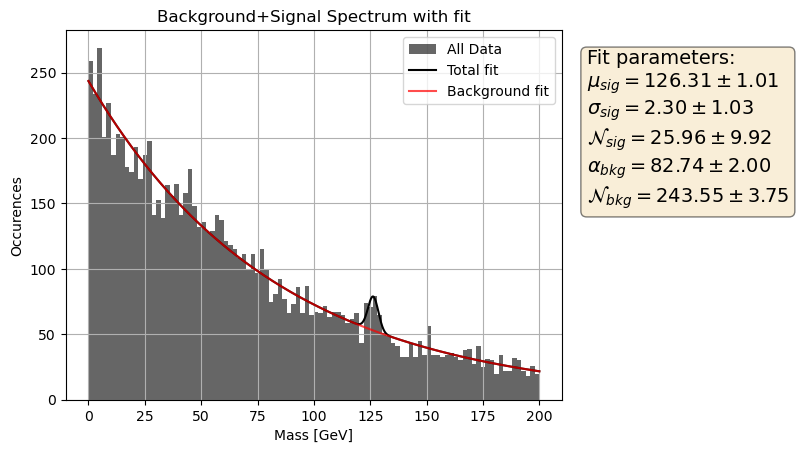

In [20]:
%matplotlib inline
fig, ax = plt.subplots()
_ = ax.grid()
_ = plt.hist(dataSample, bins=n_bins, label='All Data', color='black', alpha=0.6,
                                histtype='stepfilled', range=(x_min, x_max))
_ = ax.set_title('Background+Signal Spectrum with fit')
_ = ax.set_xlabel('Mass [GeV]')
_ = ax.set_ylabel('Occurences')

x = np.linspace(x_min,x_max,1000)
_ = ax.plot(x,total(x,normSig=pars[0], mean=pars[1], width=pars[2],normBkg=pars[3], alpha=pars[4]),
        label='Total fit',color='Black',alpha=1.0)
_ = ax.plot(x,bkg(x,norm=pars[3], alpha=pars[4]),label='Background fit',color='Red',alpha=0.7)


textstr = '\n'.join((
    'Fit parameters:',
    r'$\mu_{sig}=%.2f \pm %.2f$' % (pars[1], perr[1] ),
    r'$\sigma_{sig}=%.2f \pm %.2f$' % (pars[2], perr[2], ),
    r'$\mathcal{N}_{sig}=%.2f \pm %.2f$' % (pars[0], perr[0], ),
    r'$\alpha_{bkg}=%.2f \pm %.2f$' % (pars[4], perr[4], ),
    r'$\mathcal{N}_{bkg}=%.2f \pm %.2f$' % (pars[3], perr[3], ), ))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
_ = ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


_ = ax.legend()

# Signal Significance

The signal significance is defined as

$$
S/\sqrt{B}\,,
$$

where

$$
\begin{align}
S &= \int_a^b sig(m)\, dm\\
B &= \int_a^b bkg(m)\, dm
\end{align}
$$

with $a = m_{\rm fitted} - 3\sigma_{\rm fitted}$ and $b = m_{\rm fitted} + 3\sigma_{\rm fitted}$.

Use [scipy.integrate.quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) to compute the integral.

The result of a call to `scipy.integrate.quad` is a list with two elements:
1. the value of the integral
1. its uncertainty

## Compute $S$

In [21]:
a = pars[1]-3*perr[1]
b = pars[1]+3*perr[1]
sigm = lambda x: sig(x,pars[0],pars[1],pars[2])
S,sigS = integrate.quad(sigm,a,b)
print(f"S = {S: .2f} +- {sigS: .1e}")

S =  121.70 +-  1.4e-12


## Compute $B$

In [22]:
a = pars[1]-3*perr[1]
b = pars[1]+3*perr[1]
bkgm = lambda x: bkg(x,pars[3],pars[4])
B,sigB = integrate.quad(bkgm,a,b)
print(f"B = {B: .2f} +- {sigB: .1e}")

B =  321.15 +-  3.6e-12


## Compute significance and print the result

In [23]:
sign = S/np.sqrt(B)
print(f"Significance = {sign}")

Significance = 6.791135445851942


# Exercise 1

1. Fix the number of background events $N_B = 10000$ and vary the number of signal events $N_S$ in 
 `[10, 50, 100, 500, 1000]`
  - Plot the signficance as a function of $N_S$
  - Now change $N_B$ and generate the plot showing the data for different values of $N_B$
  - How does the significance depend on $N_S$ and $N_B$?

In [24]:
def sig(x,norm,mean,width):
    return norm*np.exp(-0.5*( (x-mean)/width )**2)
def bkg(x,norm,alpha):
    return norm*np.exp(-x/alpha)
def total(x,normSig,mean,width,normBkg,alpha):
    return sig(x,normSig,mean,width) + bkg(x,normBkg,alpha)

In [25]:
def significance(Ns,Nb,
                 s_loc=m_sig, s_scale=w_sig,
                 b_scale=bkgScale,
                 xMin=0, xMax=200, nBins=100):
    
    sigSample = np.random.normal(loc=s_loc, scale=s_scale, size=(Ns)) #generate signal
    bkgSample = np.random.exponential(scale=b_scale, size=(Nb)) #generate background
    dataSample = np.concatenate((sigSample,bkgSample),axis=0) #stack them together
    
    #constructing binned data to use for fit
    binned_data, bins = np.histogram(dataSample, bins=nBins, range=(x_min, x_max))
    #binWidth = (xMax-xMin)/nBins
    #center_bins = [i+0.5*binWidth for i in bins[:-1]]
    centerBins = 0.5*(bins[1:] + bins[:-1])

    
    #fit
    pars, pars_cov = opt.curve_fit(total,centerBins,binned_data,p0=[500, s_loc, s_scale, 1000, b_scale])
    perr = np.sqrt(np.diag(pars_cov))
    
    #Compute S and B
    a = pars[1]-3*perr[1]
    b = pars[1]+3*perr[1]
    sigm = lambda x: sig(x,pars[0],pars[1],pars[2])
    S,sigS = integrate.quad(sigm,a,b)
    bkgm = lambda x: bkg(x,pars[3],pars[4])
    B,sigB = integrate.quad(bkgm,a,b)
    
    return S/np.sqrt(B) #significance


#test to check I reobtain the previous value (order of magnitude)
s = significance(n_sig_0,n_bkg_0)
s

10.344111431587622

In [26]:
N_B_fix = 10000 #for when I fix N_B
N_S_fix = 1000
N_S_list = np.asarray([10, 50, 100, 500, 1000])
N_B_list = [10,100,1000,10**4,10**5]#,10**6]

In [27]:
sig_NBfix = np.asarray([significance(ns,N_B_fix) for ns in N_S_list])
sig_NBfix
sig_NSfix = np.asarray([significance(N_S_fix,nb) for nb in N_B_list])
sig_NSfix

array([-2.50807493,  5.58967906,  9.17711556, 18.58709559, 27.59457911])

array([223.73621373, 105.37424493,  47.49112097,  26.03608303,
        15.78438514])

In [28]:
sigMat = np.asarray([[significance(ns,nb) for ns in N_S_list] for nb in N_B_list])
sigMat

/tmp/ipykernel_24588/3197619152.py:19: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pars_cov))
/tmp/ipykernel_24588/3197619152.py:29: RuntimeWarning: invalid value encountered in double_scalars
  return S/np.sqrt(B) #significance


array([[ 2.27251626e+06,  3.70594975e+01,  4.56525597e+01,
         4.55187328e+02,  2.99844206e+02],
       [ 1.61445667e-03,  1.75821995e+01,  3.14019371e+01,
         7.54259031e+01,  1.57533547e+02],
       [            nan,  1.07746152e+01,  1.67297705e+01,
         3.47877069e+01,  5.03456138e+01],
       [-2.75424546e+00,  5.63629511e+00,  9.90510237e+00,
         1.80923837e+01,  2.90741675e+01],
       [-4.17826825e+00,  1.49713910e+00,  2.84498227e+00,
         1.04572559e+01,  1.57065131e+01]])

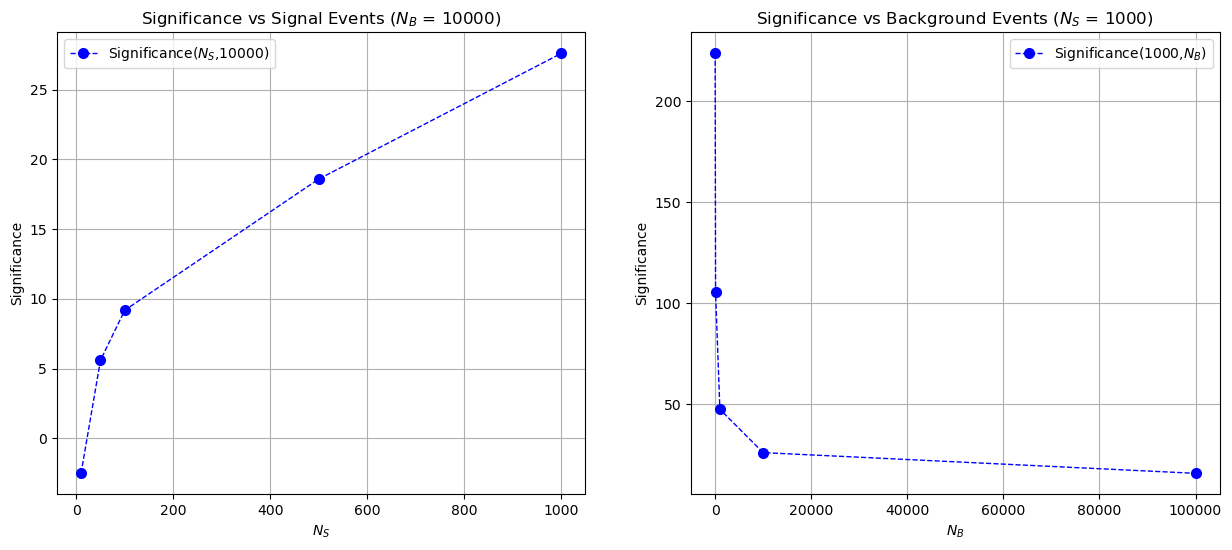

In [29]:
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

ax1.grid()


_ = ax1.plot(N_S_list, sig_NBfix, color='Blue', linestyle='dashed',
             marker='o', markersize=7, lw=1, label = r'Significance($N_S$,{0})'.format(N_B_fix))

_ = ax1.set_title(r'Significance vs Signal Events ($N_B$ = {0})'.format(N_B_fix))
_ = ax1.set_xlabel(r'$N_S$')
_ = ax1.set_ylabel('Significance')
#_= ax1.set_xticks(N_S_list)
_ = ax1.legend()

ax2.grid()

_ = ax2.plot(N_B_list, sig_NSfix, color='Blue', linestyle='dashed',
             marker='o', markersize=7, lw=1, label = r'Significance({0},$N_B$)'.format(N_S_fix))

_ = ax2.set_title(r'Significance vs Background Events ($N_S$ = {0})'.format(N_S_fix))
_ = ax2.set_xlabel(r'$N_B$')
_ = ax2.set_ylabel('Significance')
#_= ax2.set_xticks(N_B_list)
_ = ax2.legend()


<IPython.core.display.Javascript object>


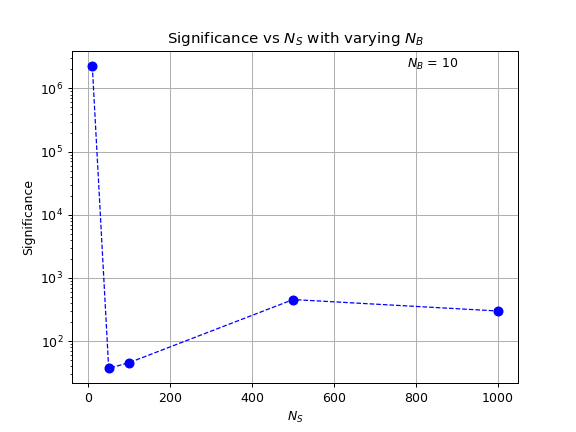

Text(0.5, 0, '$N_S$')

Text(0, 0.5, 'Significance')

Text(0.5, 1.0, 'Significance vs $N_S$ with varying $N_B$')

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
%matplotlib notebook

fig = plt.figure() #new figure

#figure general setup
ax = fig.add_subplot(111, autoscale_on=True)#, xlim=(N_S_list[0]*0.9, N_S_list[-1]*1.1), ylim=(np.min(sigMat)*0.9, np.max(sigMat)*1.1) )
ax.grid()
ax.set_xlabel(r'$N_S$')
ax.set_yscale('log')
ax.set_ylabel("Significance")
plt.title(r'Significance vs $N_S$ with varying $N_B$')

#startup of animation
graph, *_ = ax.plot(N_S_list, sigMat[0,:], color='Blue', linestyle='dashed',
             marker='o', markersize=7, lw=1)
info_template = r'$N_B$ = %.d '
info_text = ax.text(0.75,0.95,'', transform=ax.transAxes)

#function to update the plot
def update_plots(i):
    graph.set_data(N_S_list, sigMat[i,:])
    #we update te step cpunter
    info_text.set_text(info_template % (N_B_list[i]))
    # Return a tuple
    return graph, info_text

#animation of the plot
anim = animation.FuncAnimation(fig, update_plots, np.arange(0, len(N_B_list)), interval=1000, blit=True, repeat=True)

#we look at the gif
_ = plt.show() 

# Exercise 2

2. Fix $N_B = 10000$ and $N_S = 200$. Vary the mass width in `[0.01, 0.02, 0.05, 0.10, 0.20, 0.50]`
  - Plot the significance as a function of the mass width 
  - Which mass width provides the best signal significance?

In [42]:
NBfix = 10000
NSfix = 200
mw_list = np.asarray([0.01, 0.02, 0.05, 0.10, 0.20, 0.50]) * m_sig

sigmw_list = np.asarray([significance(NSfix,NBfix,s_scale=mwdith) for mwdith in mw_list ])
sigmw_list

array([1.59123290e+001, 1.32029175e+001, 1.00455477e+001, 8.52824281e+000,
       3.86893802e+000, 3.47999255e-122])

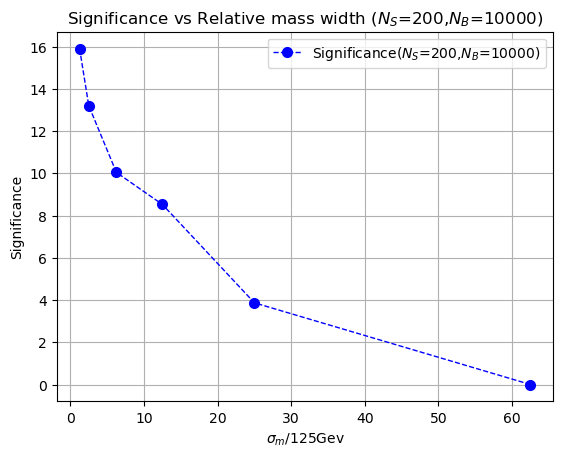

In [43]:
%matplotlib inline
fig, ax = plt.subplots()

ax.grid()

_ = ax.plot(mw_list, sigmw_list, color='Blue', linestyle='dashed',
             marker='o', markersize=7, lw=1, label = r'Significance($N_S$={0},$N_B$={1})'.format(NSfix,NBfix))

_ = ax.set_title(r'Significance vs Relative mass width ($N_S$={0},$N_B$={1})'.format(NSfix,NBfix))
_ = ax.set_xlabel(r'$\sigma_m$/125Gev')
_ = ax.set_ylabel('Significance')
_ = ax.legend()

# Exercise 3


3. Repeat the experiments 1000 times
  - For each experiment generate the number of signal and background events from a Poisson distribution
    - mean of signal events: $\langle N_S\rangle = 200$
    - mean of background events: $\langle N_B\rangle = 10000$
  - Compute the significance for each experiment
  - Plot the distribution of significance for all experiments
  - Plot the distribution of $m_{fitted} - m_H$ for all experiments
  - Fit to a Gaussian and print the fitted $\mu$ and $\sigma$

In [ ]:
#I redefine some functions
def sig(x,norm,mean,width):
    return norm*np.exp(-0.5*( (x-mean)/width )**2)
def bkg(x,norm,alpha):
    return norm*np.exp(-x/alpha)
def total(x,normSig,mean,width,normBkg,alpha):
    return sig(x,normSig,mean,width) + bkg(x,normBkg,alpha)

In [47]:
#I redefine significance such as to return  also the fitted mass
def experiment(Ns,Nb,
                 s_loc=m_sig, s_scale=w_sig,
                 b_scale=bkgScale,
                 xMin=0, xMax=200, nBins=100):
    
    sigSample = np.random.normal(loc=s_loc, scale=s_scale, size=(Ns)) #generate signal
    bkgSample = np.random.exponential(scale=b_scale, size=(Nb)) #generate background
    dataSample = np.concatenate((sigSample,bkgSample),axis=0) #stack them together
    
    #constructing binned data to use for fit
    binned_data, bins = np.histogram(dataSample, bins=nBins, range=(x_min, x_max))
    #binWidth = (xMax-xMin)/nBins
    #center_bins = [i+0.5*binWidth for i in bins[:-1]]
    centerBins = 0.5*(bins[1:] + bins[:-1])

    
    #fit
    pars, pars_cov = opt.curve_fit(total,centerBins,binned_data,p0=[500, s_loc, s_scale, 1000, b_scale])
    perr = np.sqrt(np.diag(pars_cov))
    
    #Compute S and B
    a = pars[1]-3*perr[1]
    b = pars[1]+3*perr[1]
    sigm = lambda x: sig(x,pars[0],pars[1],pars[2])
    S,sigS = integrate.quad(sigm,a,b)
    bkgm = lambda x: bkg(x,pars[3],pars[4])
    B,sigB = integrate.quad(bkgm,a,b)
    
    return S/np.sqrt(B),pars[1] #significance,fitted mass

In [54]:
#given data
Nexp = 1000
NS_mean = 200
NB_mean = 10000

#number of signal and background events for each experiment
NS_list = np.random.poisson(NS_mean,size=Nexp)
NB_list = np.random.poisson(NB_mean,size=Nexp)

#significance and fitted mass for each experiment
#I simulate the experiments and store the results: 
sign_mass_list = np.asarray( [experiment(NS_list[i],NB_list[i]) for i in range(Nexp)] ) 
#results:
sign_list = sign_mass_list[:,0]
mass_list = sign_mass_list[:,1]

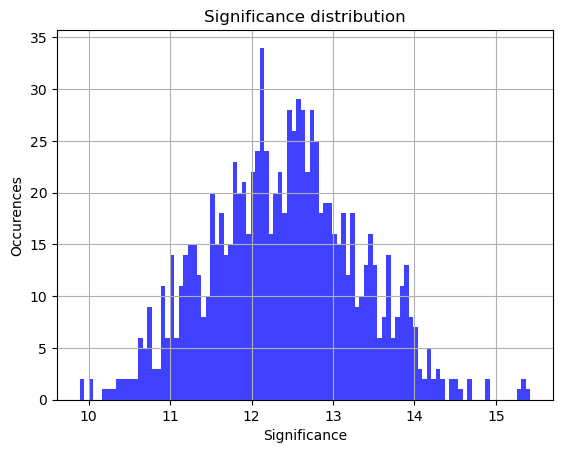

In [58]:
#distribution of significance
%matplotlib inline
fig, ax = plt.subplots()
ax.grid()

sign_bins=100
sign_range = (np.min(sign_list), np.max(sign_list))
_ = ax.hist(sign_list, sign_bins, histtype='stepfilled', range=sign_range,
                           density=False, facecolor='Blue', alpha=0.75)
_ = ax.set_title('Significance distribution')
_ = ax.set_xlabel('Significance')
_ = ax.set_ylabel('Occurences')

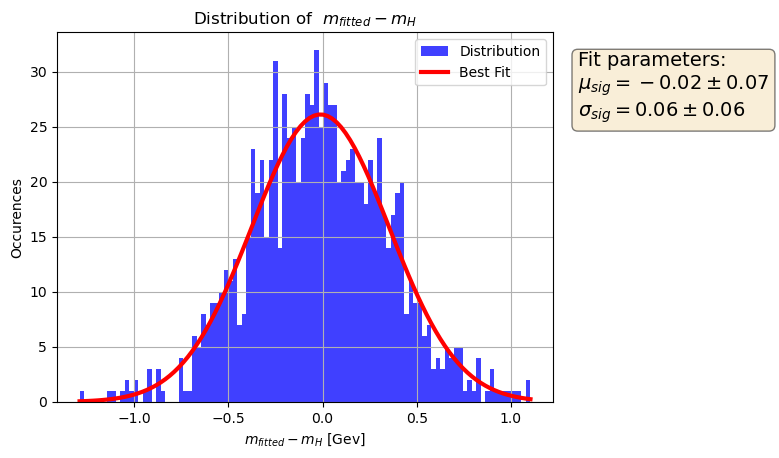

In [77]:
#distribution of mass
%matplotlib inline
fig, ax = plt.subplots()
ax.grid()

massDistr = mass_list-m_sig
mass_bins=100
mass_range = (np.min(massDistr), np.max(massDistr))
values,bins,_ = ax.hist(massDistr, mass_bins, histtype='stepfilled', range=mass_range,
                           density=False, facecolor='Blue', alpha=0.75, label='Distribution')
_ = ax.set_title(r'Distribution of  $m_{fitted} - m_H$ ')
_ = ax.set_xlabel(r'$m_{fitted} - m_H$ [Gev]')
_ = ax.set_ylabel('Occurences')

#fit
centers = (0.5*(bins[1:]+bins[:-1]))
pars, cov = opt.curve_fit(lambda x, mu, sig : stats.norm.pdf(x, loc=mu, scale=sig), centers, values)
perr = np.sqrt(np.diag(cov))

#norm factor to best overlay gaussian and distribution
binWidth = (mass_range[1]-mass_range[0] )/mass_bins
normFact = np.sum(values)*binWidth #extimation of distribution intergral

#plot fit
best_fit_line = normFact*stats.norm.pdf(bins, mu, sigma)
_ = plt.plot(bins, best_fit_line,color='Red',lw=3,label='Best Fit')

_=ax.legend()

#Display text box with fitparameters outside plot
textstr = '\n'.join((
    'Fit parameters:',
    r'$\mu_{sig}=%.2f \pm %.2f$' % (pars[0], perr[0] ),
    r'$\sigma_{sig}=%.2f \pm %.2f$' % (pars[1], perr[1], ),  ))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place the text box in upper left in axes coords
_ = ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)